# Chapter 1: The case of Ignaz Semmelweis

For additional context see chapter 1.1 of The Virus of Variation, *The Case of Ignaz Semmelweis*.
Questions? Email us at QualityIsBroken@gmail.com

In [13]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get the data

In [12]:
# Establish the dataset_url
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/vienna-general-death-to-birth-rates-by-clinic.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data(dataset_url)
df.head()

,Hospital,Clinic,Employee,Year,Births,Deaths,Rate,Note
0,Vienna General Hospital,1st Clinic,Students & Doctors,1833,3737,197,5.3,Second clinic started
1,Vienna General Hospital,1st Clinic,Students & Doctors,1834,2657,205,7.7,NaN
2,Vienna General Hospital,1st Clinic,Students & Doctors,1835,2573,143,5.6,NaN
3,Vienna General Hospital,1st Clinic,Students & Doctors,1836,2677,200,7.5,NaN
4,Vienna General Hospital,1st Clinic,Students & Doctors,1837,2765,251,9.1,NaN


## Sub-select df to get 1846 data

In [11]:
# Create df_1846
df_1846 = df[df['Year'] == 1846].reset_index(drop=True)
df_1846

,Hospital,Clinic,Employee,Year,Births,Deaths,Rate,Note
0,Vienna General Hospital,1st Clinic,Students & Doctors,1846,4010,459,11.4,NaN
1,Vienna General Hospital,2nd Clinic,Midwives,1846,3754,105,2.8,NaN


## Fig 1.1. Bar chart of death-to-birth rates by clinic at Vienna General Hospital in 1846

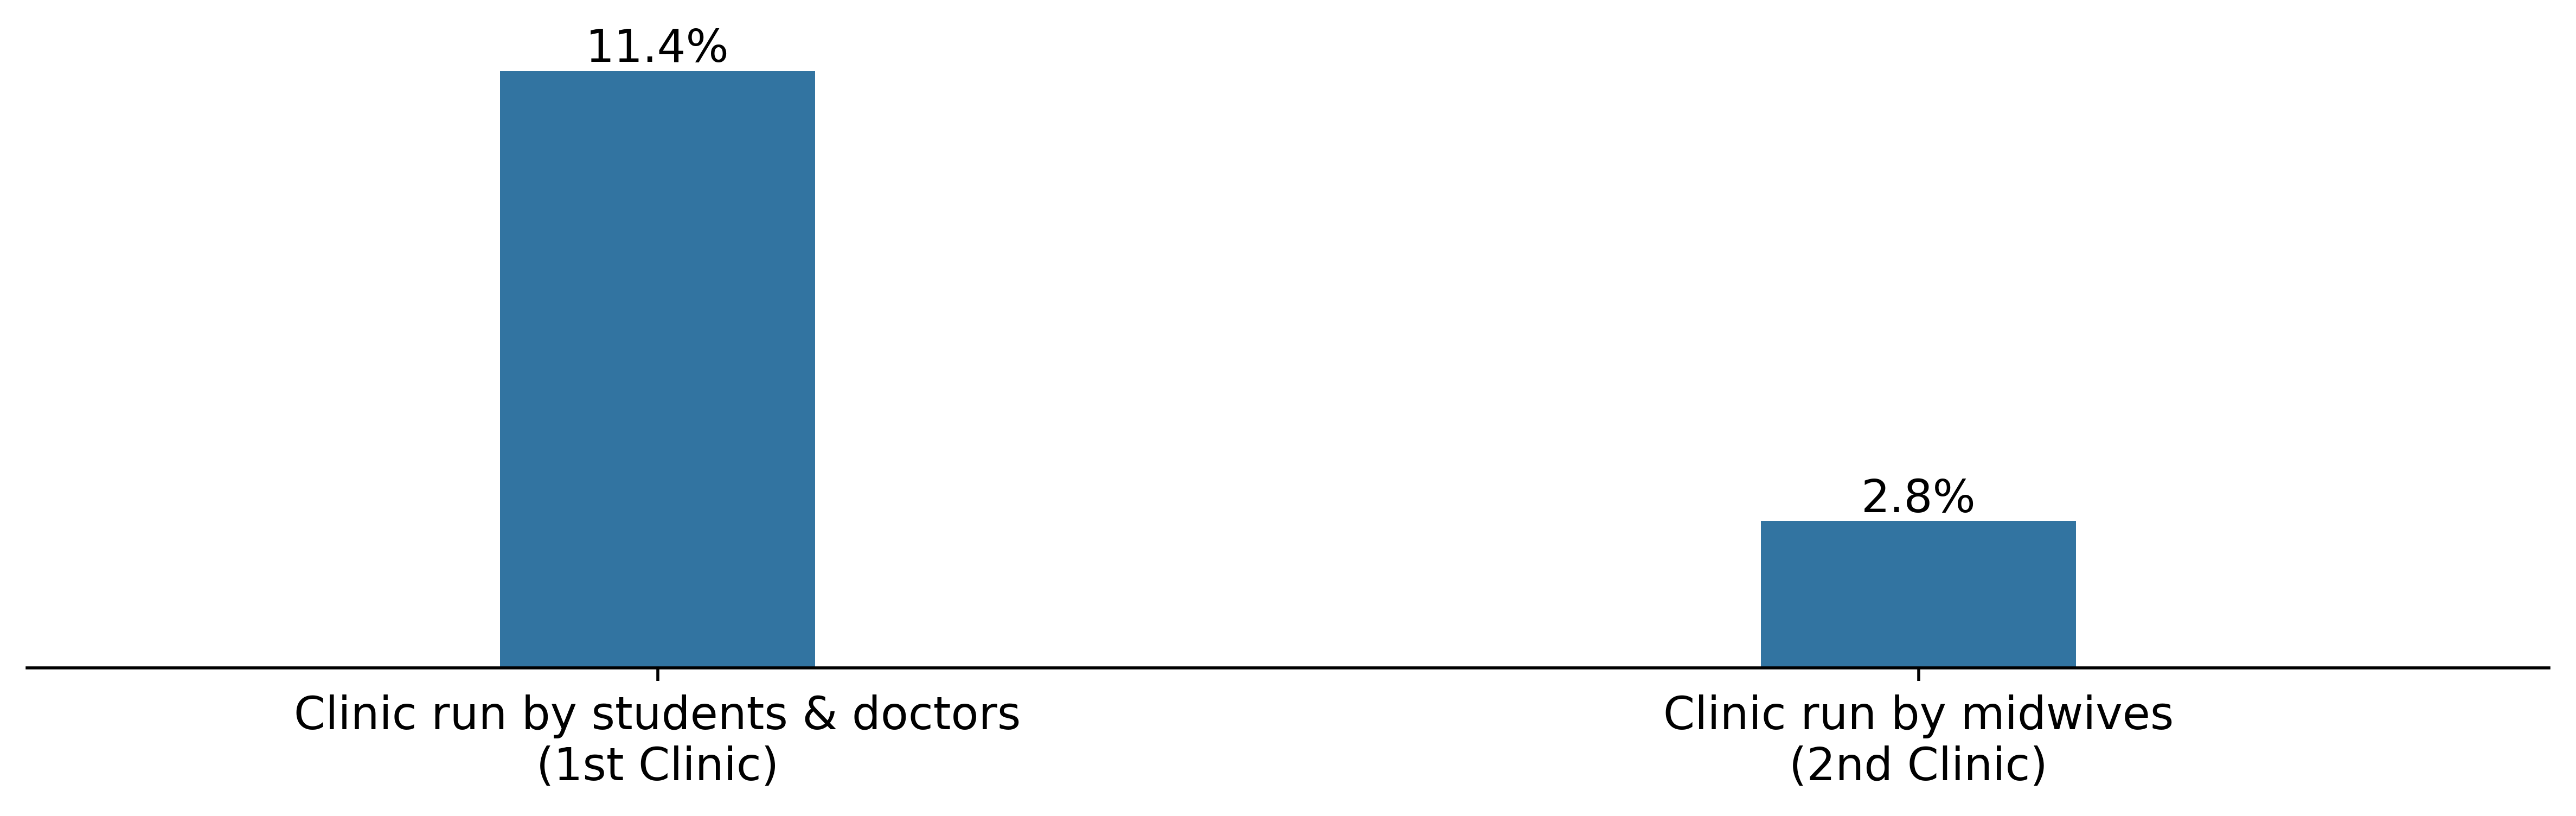

In [10]:
# Create custom label for bar chart x-axis
labels = ['Clinic run by students & doctors\n(1st Clinic)',
          'Clinic run by midwives\n(2nd Clinic)']

# Create bar chart
fig,ax = plt.subplots(figsize=(12,3), dpi=500)

barplot = sns.barplot(x=labels, 
                      y=df_1846['Rate'], 
                      color='tab:blue', 
                      width=0.25)

# Add labels on top of the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center', 
        va='bottom',
        fontsize=12,
        color='black'
    )

# Formatting
ax.tick_params(axis='x', labelsize=12)
ax.set_yticks([])
ax.set_ylabel('')

# Despine plot
sns.despine(left=True)

# Show plot
plt.show()